In [1]:
import pandas as pd

C:\Users\Elena\Desktop\sandbox\ve\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Elena\Desktop\sandbox\ve\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Elena\Desktop\sandbox\ve\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("powerconsumption.csv")

In [3]:
import datetime
from datetime import datetime, date, time

In [4]:
#изменение формата даты с object на datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [5]:
#Добавление  колонок - дата и время. сумма потребления электроэнергии
df['date'] = [d.date() for d in df['Datetime']]
df['time'] = [d.time() for d in df['Datetime']]
df['PC_Sum']=df["PowerConsumption_Zone1"]+df["PowerConsumption_Zone2"]+df["PowerConsumption_Zone3"]

In [19]:
#выделяем таблицу с потреблением электроэнергии и температуры
df_data = ['date', 'time', 'Temperature', 'PC_Sum']

In [20]:
df_data=df[df_data]
df_data.head(3)

,date,time,Temperature,PC_Sum
0,2017-01-01,00:00:00,6.559,70425.53544
1,2017-01-01,00:10:00,6.414,69320.84387
2,2017-01-01,00:20:00,6.313,67803.22193


<AxesSubplot:xlabel='PC_Sum'>

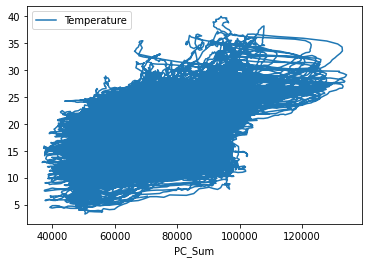

In [12]:
df_data.plot("PC_Sum")

In [13]:
#группируем по дате среднее значение потребления электроэнергии
df_date_mean = df_data.groupby(['date']).mean()
df_date_mean

,Temperature,PC_Sum
date,,
2017-01-01,9.675299,64071.818534
2017-01-02,12.476875,66247.982154
2017-01-03,12.100000,68240.519974
2017-01-04,10.509479,68465.603003
2017-01-05,10.866444,68501.029337
...,...,...
2017-12-26,11.621840,66166.161486
2017-12-27,15.232917,66522.723556
2017-12-28,13.662361,66019.282557


<AxesSubplot:xlabel='PC_Sum'>

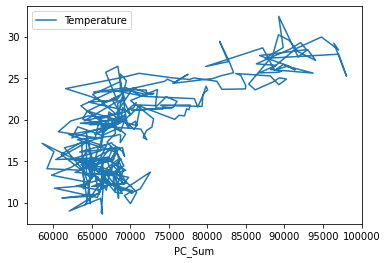

In [15]:
df_date_mean.plot("PC_Sum")

In [16]:
#выделяем таблицу с потреблением электроэнергии и температуры
df_date = ['date', 'PC_Sum']

In [18]:
df_date=df[df_date]
df_date.head(3)

,date,PC_Sum
0,2017-01-01,70425.53544
1,2017-01-01,69320.84387
2,2017-01-01,67803.22193


<AxesSubplot:>

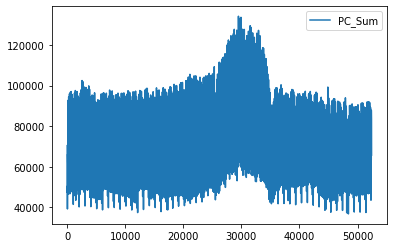

In [21]:
df_date.plot()

In [22]:
df_date_mean_1 = ['date', 'PC_Sum']

In [24]:
df_date_mean_1 = df[df_date_mean_1]
df_date_mean_1

,date,PC_Sum
0,2017-01-01,70425.53544
1,2017-01-01,69320.84387
2,2017-01-01,67803.22193
3,2017-01-01,65489.23209
4,2017-01-01,63650.44627
...,...,...
52411,2017-12-30,72798.08659
52412,2017-12-30,70983.80786
52413,2017-12-30,68675.04965
52414,2017-12-30,67163.01682


<AxesSubplot:>

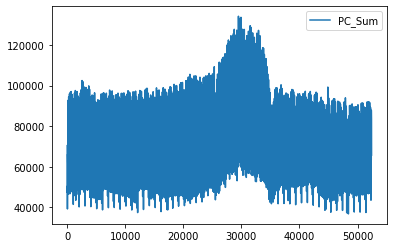

In [25]:
df_date_mean_1.plot()

In [43]:
p1=df_date_mean_1.groupby(['date']).mean()

<AxesSubplot:xlabel='date'>

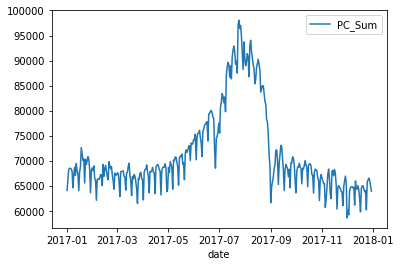

In [44]:
p1.plot()

In [35]:
df_date_mean_2 = ['date', 'Temperature']

In [36]:
df_date_mean_2 = df[df_date_mean_2]
df_date_mean_2

,date,Temperature
0,2017-01-01,6.559
1,2017-01-01,6.414
2,2017-01-01,6.313
3,2017-01-01,6.121
4,2017-01-01,5.921
...,...,...
52411,2017-12-30,7.010
52412,2017-12-30,6.947
52413,2017-12-30,6.900
52414,2017-12-30,6.758


<AxesSubplot:>

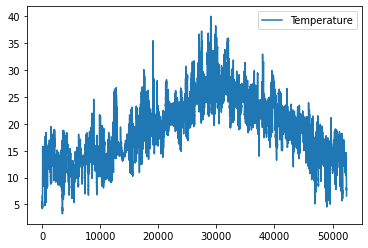

In [28]:
df_date_mean_2.plot()

In [41]:
p2=df_date_mean_2.groupby(['date']).mean()

<AxesSubplot:xlabel='date'>

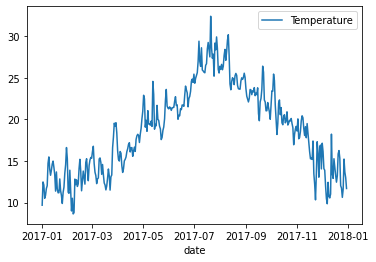

In [42]:
p2.plot()

In [48]:
import datetime

In [50]:
from datetime import datetime, date, time

In [52]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         52416 non-null  datetime64[ns]
 1   time         52416 non-null  object        
 2   Temperature  52416 non-null  float64       
 3   PC_Sum       52416 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+ MB


In [53]:
import matplotlib.pyplot as plt

In [62]:
period_7 = 7 #days

In [63]:
rd_7 = p1.rolling(period_7).mean().dropna()

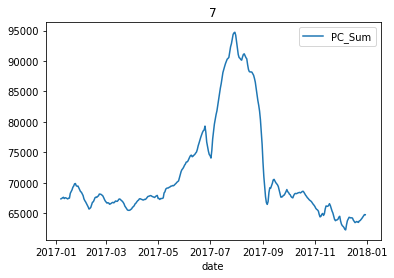

In [64]:
rd_7.plot()
plt.title(7);

In [71]:
period_30 = 30 #days


In [65]:
rd_30 = p1.rolling(period_30).mean().dropna()

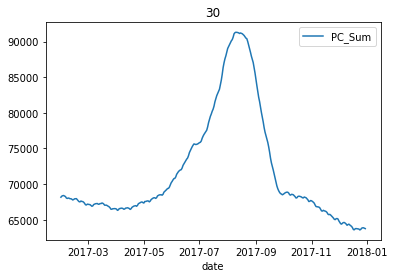

In [66]:
rd_30.plot()
plt.title(30);

In [72]:
rd_7t = p2.rolling(period_7).mean().dropna()

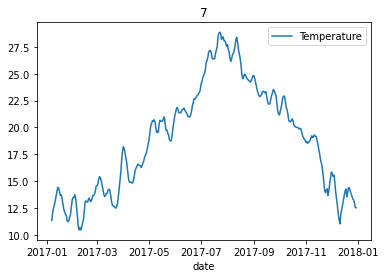

In [73]:
rd_7t.plot()
plt.title(7);

In [74]:
rd_30t = p2.rolling(period_30).mean().dropna()

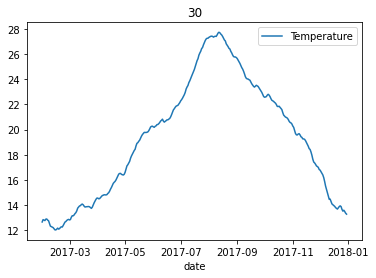

In [75]:
rd_30t.plot()
plt.title(30);

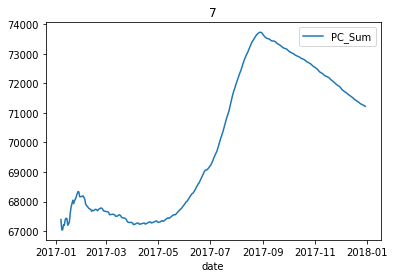

In [76]:
ed = p1.expanding(7).mean()
ed.plot()
plt.title(7);

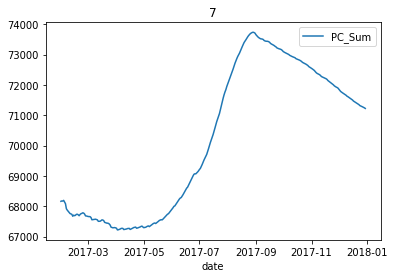

In [80]:
edt= p2.expanding(7).mean()
ed.plot()
plt.title(7);

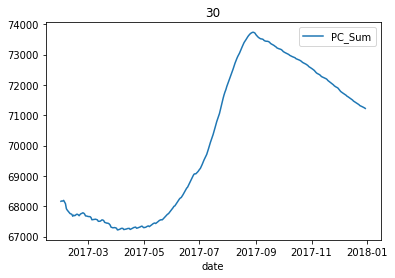

In [81]:
ed = p1.expanding(30).mean()
ed.plot()
plt.title(30);

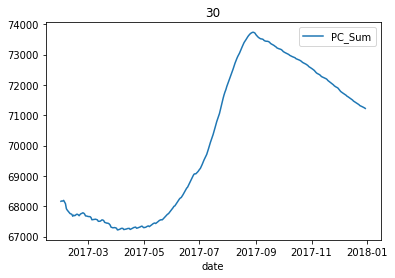

In [79]:
edt = p2.expanding(30).mean()
ed.plot()
plt.title(30);

In [83]:
import seaborn as sns

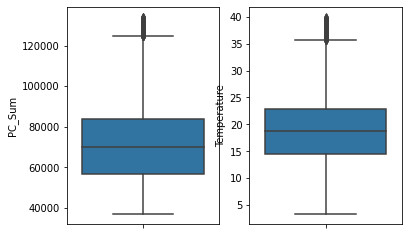

In [86]:
fig, ax = plt.subplots(1,2)
sns.boxplot(data=df_date_mean_1, y="PC_Sum", ax = ax[0])
sns.boxplot(data=df_date_mean_2, y="Temperature", ax = ax[1]);